from https://www.kaggle.com/volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary

# 데이터 준비

In [ ]:
# !wget https://github.com/dhrim/deep_learning_data/raw/master/fraud_detection_bank_dataset.zip

In [ ]:
# !unzip creditcard.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩

In [ ]:
df = pd.read_csv("fraud_detection_bank_dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,...,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,0,0,0,0,0,1,0,1,0,0,0,0,0,9,74,19,25,0,0,1,3,24,0,0,0,2,0,97,0,981,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,4,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7,1,0,0,0,1,1,0,0,0,0,0,0,0,0,18,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,13,7,5,0,0,1,5,0,0,0,0,0,0,5,0,91,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,0,0,0,0,0,0,0,1,0,0,0,0,0,23,52,1,7,0,0,1,1,1,9,0,0,0,0,3,0,26,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,20,3,11,0,0,1,4,20,0,0,0,0,0,52,0,669,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,175,1


In [ ]:
print(len(df))

20468


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.targets.unique()

array([1, 0])

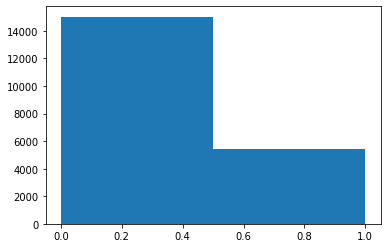

In [ ]:
plt.hist(df.targets, bins=2)
plt.show()

In [ ]:
print(df.targets.value_counts())

0    15030
1     5438
Name: targets, dtype: int64


In [ ]:
df = df.sample(frac=1)

# Normalization

In [ ]:
df = (df - df.min()) / (df.max() - df.min())

In [ ]:
df.isna().sum().sum()

307020

In [ ]:
df.fillna(0, inplace=True)
df.isna().sum().sum()

0

In [ ]:
df_orgin = df.copy()

# by AutoEncoder

## train / test 데이터 분리

In [ ]:
class1_df = df[df.targets==1]
class1_count = len(class1_df)
print(class1_count)

5438


In [ ]:
class0_df = df[df.targets==0]
print(len(class0_df))

15030


In [ ]:
class0_df = class0_df.reset_index()
class0_df.head()

,index,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,...,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,18602,0.908878,0.001738,0.011347,0.0,0.002591,0.0,0.000000,0.666667,0.001738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.001493,0.004965,0.0011,0.005772,0.00000,0.0,1.0,0.014778,0.013361,0.0,0.000000,0.000000,0.000000,0.0,0.000011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211513,0.0
1,7735,0.377925,0.000435,0.001428,0.0,0.002591,0.0,0.000000,0.000000,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000299,0.000261,0.0011,0.000000,0.00495,0.0,1.0,0.004926,0.000000,0.0,0.000000,0.000000,0.003501,0.0,0.000095,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009371,0.0
2,10537,0.514829,0.003477,0.059273,0.0,0.001295,0.0,0.017391,0.083333,0.003477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.003285,0.032056,0.0033,0.033189,0.00000,0.0,1.0,0.024631,0.058582,0.0,0.092593,0.111111,0.039673,0.0,0.002462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.05,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.253012,0.0
3,17498,0.854937,0.000435,0.006321,0.0,0.005181,0.0,0.000000,0.000000,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000299,0.002352,0.0044,0.001443,0.00495,0.0,1.0,0.034483,0.001028,0.0,0.000000,0.000000,0.008168,0.0,0.000116,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080321,0.0
4,9171,0.448087,0.000869,0.004444,0.0,0.002591,0.0,0.000000,0.083333,0.000869,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000597,0.001220,0.0011,0.005772,0.00000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061580,0.0


In [ ]:
class0_df = class0_df.reset_index()

class0_test_df = class0_df.iloc[class0_df.index<=class1_count]
class0_df.drop(class0_test_df.index, inplace=True)
print(len(class0_test_df))
print(len(class0_df))

5439
9591


In [ ]:
train_df = class0_df
print(len(train_df))
test_df = class1_df.append(class0_test_df)
print(len(test_df))

9591
10877


## numpy로 변환

In [ ]:
train_df.drop(columns=["Unnamed: 0", "level_0", "index", "targets"], inplace=True)
print(train_df.head())

         col_0     col_1     col_2  ...  col_109   col_110   col_111
5439  0.000000  0.022720  0.000000  ...      1.0  0.000000  0.224900
5440  0.039548  0.044382  0.006637  ...      0.0  0.058824  0.215529
5441  0.000435  0.006930  0.000000  ...      0.0  0.000000  0.000000
5442  0.000000  0.000926  0.001106  ...      0.0  0.000000  0.000000
5443  0.001304  0.005660  0.000000  ...      0.0  0.000000  0.009371

[5 rows x 112 columns]


In [ ]:
train_data = train_df.to_numpy()
print(train_data.shape)

(9591, 112)


In [ ]:
test_df.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,...,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets,level_0,index
1318,0.064396,0.0,0.005131,0.0,0.000000,0.0,0.026087,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.006601,0.0,0.0,0.0,1.0,0.019704,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117805,1.0,NaN,NaN
2639,0.128939,0.0,0.000503,0.0,0.000000,0.0,0.004348,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.001100,0.0,0.0,0.0,1.0,0.004926,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133869,1.0,NaN,NaN
3180,0.155372,0.0,0.009469,0.0,0.001295,0.0,0.004348,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001394,0.001100,0.0,0.0,0.0,1.0,0.014778,0.004111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093708,1.0,NaN,NaN
2378,0.116187,0.0,0.000450,0.0,0.001295,0.0,0.004348,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.001100,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016064,1.0,NaN,NaN
4638,0.226609,0.0,0.001878,0.0,0.000000,0.0,0.004348,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.001100,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,NaN,NaN


In [ ]:
test_y = test_df.targets.to_numpy()
print(test_y.shape)
print(test_y[:10])

(10877,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
test_df.drop(columns=["Unnamed: 0", "level_0", "index", "targets"], inplace=True)
test_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111
1318,0.0,0.005131,0.0,0.000000,0.0,0.026087,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.006601,0.0,0.0,0.0,1.0,0.019704,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117805
2639,0.0,0.000503,0.0,0.000000,0.0,0.004348,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.001100,0.0,0.0,0.0,1.0,0.004926,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133869
3180,0.0,0.009469,0.0,0.001295,0.0,0.004348,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001394,0.001100,0.0,0.0,0.0,1.0,0.014778,0.004111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093708
2378,0.0,0.000450,0.0,0.001295,0.0,0.004348,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.001100,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016064
4638,0.0,0.001878,0.0,0.000000,0.0,0.004348,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.001100,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
test_x = test_df.to_numpy()
print(test_x.shape)
print(test_x[0])

(10877, 112)
[0.00000000e+00 5.13118917e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.60869565e-02 8.33333333e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.71080139e-05
 6.60066007e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 1.97044335e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000

## 모델 학습

In [ ]:
feature_count = train_x.shape[1]
print(feature_count)

112


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=feature_count))
model.add(Dense(5, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(feature_count))

model.compile(optimizer='Adam', loss='mse', metrics=["mape"])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  

hist = model.fit(train_x, train_x, epochs=1000, batch_size=256, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/1000
58/58 [==============================] - 1s 6ms/step - loss: 0.0375 - mape: 17364870.0000 - val_loss: 0.0306 - val_mape: 24806738.0000
Epoch 2/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.0259 - mape: 30538352.0000 - val_loss: 0.0227 - val_mape: 31284538.0000
Epoch 3/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.0220 - mape: 28895774.0000 - val_loss: 0.0209 - val_mape: 26342534.0000
Epoch 4/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.0204 - mape: 25200190.0000 - val_loss: 0.0195 - val_mape: 24342280.0000
Epoch 5/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.0192 - mape: 23953562.0000 - val_loss: 0.0187 - val_mape: 23741656.0000
Epoch 6/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.0186 - mape: 24075938.0000 - val_loss: 0.0181 - val_mape: 25763518.0000
Epoch 7/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.0177 - mape: 24988014.0000 - val_los

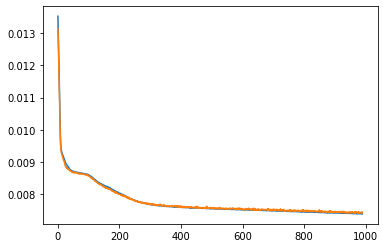

In [ ]:
plt.plot(hist.history['loss'][10:])
plt.plot(hist.history['val_loss'][10:])
plt.show()

## 탐지 실행

### threshold 구하기

In [ ]:
reconstructed = model.predict(train_x)

train_mae = np.mean(np.abs(reconstructed - train_x), axis=-1)
print(train_mae)

[0.04123815 0.00503332 0.01096748 ... 0.02669072 0.00718101 0.0183418 ]


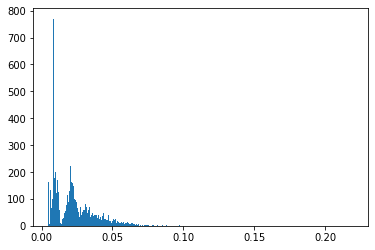

In [ ]:
plt.hist(train_mae, bins=1000)
plt.show()

In [ ]:
sorted_mae = np.sort(train_mae)
threshold_index = int(len(sorted_mae)*0.99)
threshold = sorted_mae[threshold_index]

print(threshold)

0.07155259894236218


### 테스트 데이터 모델 예측

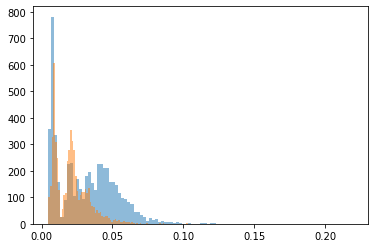

In [ ]:
reconstructed = model.predict(test_x)
test_mae = np.mean(np.abs(reconstructed - test_x), axis=-1)

half_index = int(len(test_mae)*0.5)
plt.hist(test_mae[:half_index], bins=100, alpha=0.5)
plt.hist(test_mae[half_index:], bins=100, alpha=0.5)
plt.show()

In [ ]:
predicted = (test_mae > threshold).astype(np.int16)
n = len(test_x)
accuracy = (predicted == test_y).sum() / n

print("accuracy=", accuracy)

accuracy= 0.5119058563942264


In [ ]:
for i in range(1, 15):
    predicted = (test_mae > threshold*i/10.).astype(np.int16)

    n = len(test_x)
    accuracy = (predicted == test_y).sum() / n

    print(i, "accuracy=", accuracy)
        

1 accuracy= 0.48984094879102696
2 accuracy= 0.5224786246207594
3 accuracy= 0.5883975360853176
4 accuracy= 0.6437436793233429
5 accuracy= 0.6573503723453158
6 accuracy= 0.6287579295761699
7 accuracy= 0.5823296864944378
8 accuracy= 0.5474855199043854
9 accuracy= 0.5235818700009194
10 accuracy= 0.5119058563942264
11 accuracy= 0.5067573779534799
12 accuracy= 0.503447641813
13 accuracy= 0.5019766479727866
14 accuracy= 0.5011492139376666


# by Classifier

## x, y로 데이터 분리

In [ ]:
df = df_orgin.copy()

In [ ]:
y = df.targets.to_numpy()
print(y.shape)
print(y[:10])

(20468,)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
df.drop(columns=["Unnamed: 0", "targets"], inplace=True)
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111
1397,0.000869,0.002222,0.0,0.001295,0.0,0.004348,0.083333,0.000869,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000597,0.000523,0.0011,0.000000,0.0,0.0,1.0,0.014778,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000014,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093708
11905,0.000000,0.000106,0.0,0.001295,0.0,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000087,0.0011,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009371
7528,0.000869,0.002777,0.0,0.002591,0.0,0.000000,0.000000,0.000869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000438,0.0,0.0,0.0,0.0,0.000896,0.001220,0.0011,0.001443,0.0,0.0,1.0,0.000000,0.001028,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060241
11794,0.000000,0.000106,0.0,0.001295,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000087,0.0011,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009371
9179,0.001304,0.019625,0.0,0.001295,0.0,0.004348,0.250000,0.001304,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000896,0.005052,0.0011,0.000000,0.0,0.0,1.0,0.000000,0.025694,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.008293,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009371


In [ ]:
x = df.to_numpy()
print(x.shape)
print(x[:2])

(20468, 112)
[[8.69187310e-04 2.22175201e-03 0.00000000e+00 1.29533679e-03
  0.00000000e+00 4.34782609e-03 8.33333333e-02 8.69187310e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.97193192e-04 5.22648084e-04
  1.10011001e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 1.47783251e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.36392155e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.20647491e-06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000

## train / test로 분리

In [ ]:
 i = int( len(x)*0.8 )
 train_x, test_x = x[:i], x[i:]
 train_y, test_y = y[:i], y[i:]

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(16374, 112)
(16374,)
(4094, 112)
(4094,)


## 모델 학습

In [ ]:
feature_count = train_x.shape[1]
print(feature_count)

112


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
model.add(Dense(25, activation='relu', input_dim=feature_count))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["acc"])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  

hist = model.fit(train_x, train_y, epochs=1000, batch_size=256, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/1000
58/58 [==============================] - 1s 5ms/step - loss: 0.6057 - acc: 0.6861 - val_loss: 0.4845 - val_acc: 0.7912
Epoch 2/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.4185 - acc: 0.8335 - val_loss: 0.3771 - val_acc: 0.8578
Epoch 3/1000
58/58 [==============================] - 0s 4ms/step - loss: 0.3515 - acc: 0.8575 - val_loss: 0.3499 - val_acc: 0.8651
Epoch 4/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.3305 - acc: 0.8652 - val_loss: 0.3386 - val_acc: 0.8639
Epoch 5/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.3188 - acc: 0.8670 - val_loss: 0.3317 - val_acc: 0.8657
Epoch 6/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.3106 - acc: 0.8685 - val_loss: 0.3272 - val_acc: 0.8675
Epoch 7/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.3044 - acc: 0.8698 - val_loss: 0.3226 - val_acc: 0.8706
Epoch 8/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.

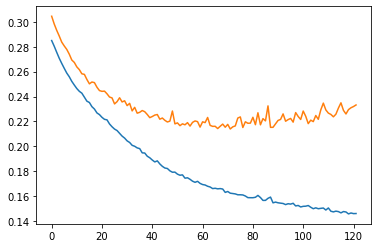

In [ ]:
plt.plot(hist.history['loss'][10:])
plt.plot(hist.history['val_loss'][10:])
plt.show()

In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("acc = ",acc)

128/128 [==============================] - 0s 2ms/step - loss: 0.2383 - acc: 0.9155
acc =  0.9154860973358154
